In [2]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from num2words import num2words
import csv
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import pandas as pd


# Data Augmentation:

In [2]:
df=pd.read_csv('ds_beforeduplication.csv')
# df=pd.read_csv('booksum_preprocessed.csv')
# df=pd.read_csv('booksumm_org.csv')
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
8794,16541,Nevermore: The Final Maximum Ride Adventure,Young adult literature,The prologue is Angel's vision of Max's death...
8795,16542,The Bourne Imperative,Thriller,:For a more detailed background of the main c...
8796,16551,Remote Control,Thriller,The series follows the character of Nick Ston...
8797,16555,Transfer of Power,Thriller,The reader first meets Rapp while he is doing...


In [3]:
df.Genres.value_counts()

fiction                   1615
Children's literature     1152
Science Fiction            999
Novel                      925
Mystery                    734
historical                 727
Fantasy                    624
Thriller                   568
Young adult literature     321
comedy                     174
autobiography              170
Non-fiction                166
Spy fiction                112
Horror                      88
Romance novel               68
Adventure novel             60
Picture book                49
Memoir                      43
Biography                   39
Techno-thriller             37
Short story                 36
Literary fiction            27
Philosophy                  23
Urban fantasy               22
Sword and sorcery           20
Name: Genres, dtype: int64

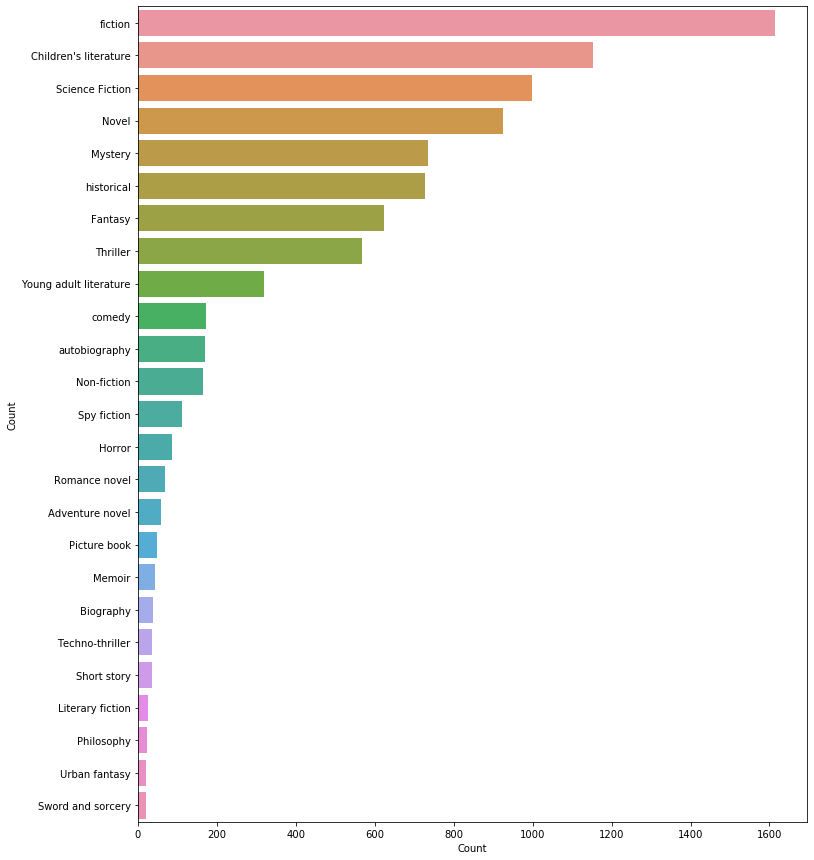

In [8]:
import nltk as nltk
import seaborn as sns
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [3]:
import random
from random import shuffle
stop_words = set(stopwords.words('english'))
from nltk.corpus import wordnet

In [45]:
def synonym_replacement(words, n):
	new_words = words.copy()
	random_word_list = list(set([word for word in words if word not in stop_words]))
	random.shuffle(random_word_list)
	num_replaced = 0
	for random_word in random_word_list:
		synonyms = get_synonyms(random_word)
		if len(synonyms) >= 1:
			synonym = random.choice(list(synonyms))
			new_words = [synonym if word == random_word else word for word in new_words]
			#print("replaced", random_word, "with", synonym)
			num_replaced += 1
		if num_replaced >= n: #only replace up to n words
			break

	#this is stupid but we need it, trust me
	sentence = ' '.join(new_words)
	new_words = sentence.split(' ')

	return new_words

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name().replace("_", " ").replace("-", " ").lower()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [14]:
synonym_replacement(['hello','pretty','ugly','cloud','both','how'],3)

['howdy', 'moderately', 'slimy', 'cloud', 'both', 'how']

In [79]:
glist2=["Horror",
"Romance novel",
"Adventure novel",
"Picture book",
"Memoir",
"Biography",
"Techno-thriller",
"Short story",
"Literary fiction",
"Philosophy",
"Urban fantasy",
"Sword and sorcery",

]

glist3=[
 'comedy',
 'autobiography',
 'Non-fiction',
 'Spy fiction']
glist4=['Young adult literature',
 'Mystery',
 'historical',
 'Fantasy',
 'Thriller',]



In [89]:
def applysynonym(row):
#     row=row1[3]
#     row1=temp.loc[row1]
#     print(row)
    words=word_tokenize(row)
    n=len(words)
    res=synonym_replacement(words,n//10)
    return ' '.join(res)

In [97]:
def augmentdata(g,n):
    global df
    temp=df[df.Genres==g]
    temp1=temp
    for i in range(n):
        temp1.Summary=temp.Summary.apply(applysynonym)
        df=df.append(temp1,ignore_index=True)
    return

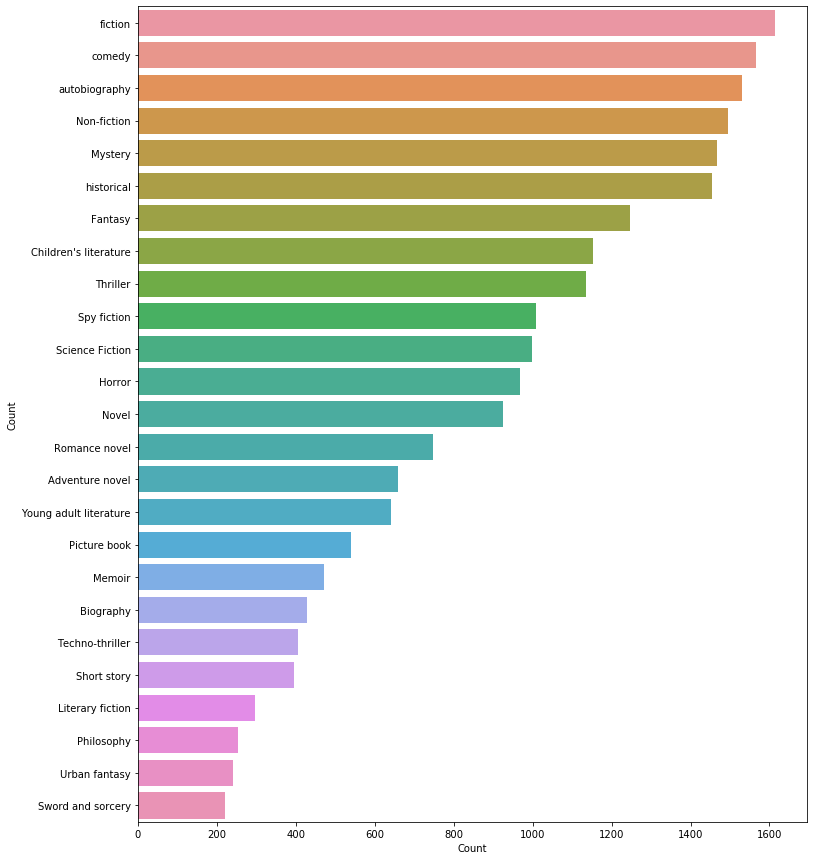

In [9]:
df=pd.read_csv('./augmented_data.csv')
all_genres=df.Genres.value_counts()
all_genres = nltk.FreqDist(df.Genres) 
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [103]:
#augmenting different genres different number of times so that overall distribution is even
for g in glist2:
    augmentdata(g,10)

for g in tqdm(glist3):
    augmentdata(g,8)

for g in tqdm(glist4):
    augmentdata(g,1)

# for g in glist2:
#     df_try=df[df.Genres==g]
#     df=df.append([df_try]*10,ignore_index=True)

# for g in glist4:
#     df_try=df[df.Genres==g]
#     df=df.append([df_try]*2,ignore_index=True)

df

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:00<00:00, 12.19s/it]


,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,"Alex, a teenager living in near-future Englan..."
1,6,A Wizard of Earthsea,Children's literature,"Ged is a young boy on Gont, one of the larger..."
2,8,Blade Runner 3: Replicant Night,Science Fiction,"Living on Mars, Deckard is acting as a consul..."
3,9,Blade Runner 2: The Edge of Human,Science Fiction,Beginning several months after the events in ...
4,21,Children of Dune,Science Fiction,Nine years after Emperor Paul Muad'dib walked...
...,...,...,...,...
21864,16414,Carver,Thriller,"The exchange character , Samuel carver , is an..."
21865,16442,Rabies,Thriller,"determined in early 1980s , during the height ..."
21866,16542,The Bourne Imperative,Thriller,: For a more detailed background of the main c...
21867,16551,Remote Control,Thriller,The series follows the character of dent Stone...


In [104]:
df.Genres.value_counts()

fiction                   1615
comedy                    1566
autobiography             1530
Non-fiction               1494
Mystery                   1468
historical                1454
Fantasy                   1248
Children's literature     1152
Thriller                  1136
Spy fiction               1008
Science Fiction            999
Horror                     968
Novel                      925
Romance novel              748
Adventure novel            660
Young adult literature     642
Picture book               539
Memoir                     473
Biography                  429
Techno-thriller            407
Short story                396
Literary fiction           297
Philosophy                 253
Urban fantasy              242
Sword and sorcery          220
Name: Genres, dtype: int64

# Preprocessing summary

In [105]:

def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(str(data))
    
    filtered_data = ""
    
    for w in word_tokens:
        if w not in stop_words and len(w)>1:
            filtered_data=filtered_data+" "+w
    return filtered_data
    
def remove_punctuation(data):
    marks="~!@#$%^&*()_+=-`[]\;'./{}|:<>?""'\n"
    
    for i in marks:
        data=np.char.replace(data,i,' ')
        data=np.char.replace(data,"  "," ")
    
    data=np.char.replace(data,",",'')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    
    return new_text

def lemmatize(data):
    wnl=WordNetLemmatizer()
    tokens = word_tokenize(str(data))
    
    new_text = ""
    
    for w in tokens:
        new_text = new_text + " " + wnl.lemmatize(w)
    
    return new_text


def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def preprocess(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
    data = stemming(data)
    
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


def preprocesswithoutstem(data):
    data=np.char.lower(data)
    
    data = remove_punctuation(data) #remove comma seperately
    
    data = remove_apostrophe(data)
    
    data = remove_stopwords(data)
    
    data = convert_numbers(data)
    
#     data = stemming(data)
    
    data = remove_punctuation(data)
#     data = stemming(data) #needed again as we need to stem the words
#     data = remove_punctuation(data)
    data = convert_numbers(data)
    data = remove_stopwords(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data


In [107]:
df.Summary=df.Summary.apply(preprocesswithoutstem)
df

,Unnamed: 0,Name,Genres,Summary
0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...
21864,16414,Carver,Thriller,exchange character samuel carver ex assassin ...
21865,16442,Rabies,Thriller,determined early 1980s height cold warfare no...
21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,16551,Remote Control,Thriller,series follows character dent stone ex milita...


# Classifying on augemented data

In [12]:
df=pd.read_csv('../Datasets/augmented_data.csv')

In [13]:
# df.Genres=df.Genres.apply(lambda x:x[0])
df

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,exchange character samuel carver ex assassin ...
21865,21865,16442,Rabies,Thriller,determined early 1980s height cold warfare no...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character dent stone ex milita...


In [14]:
X=df.Summary
Y=df.Genres.values
X.shape, Y.shape

((21869,), (21869,))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [17]:
type(X_train), type(Y_train)
X_train.shape, Y_train.shape

((15308,), (15308,))

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
nb = Pipeline([
# ('vect', CountVectorizer(ngram_range=(1,2))),
#                ('tfidf', TfidfTransformer()),
         
#                ('svd',TruncatedSVD(n_components=250)),
# #                ('pca',PCA(n_components=500, copy=True, whiten=False, svd_solver='full', tol=0.0, iterated_power='auto', random_state=None)),      
#                 ('ss',MinMaxScaler()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [112]:
from sklearn.metrics import classification_report
Y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.21489748248118348


c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                          precision    recall  f1-score   support

                       Absurdist fiction       0.00      0.00      0.00         2
                               Adventure       0.00      0.00      0.00         2
                         Adventure novel       0.00      0.00      0.00        19
                       Alternate history       0.00      0.00      0.00        54
                            Anthropology       0.00      0.00      0.00         1
Apocalyptic and post-apocalyptic fiction       0.00      0.00      0.00         2
                  Autobiographical novel       0.00      0.00      0.00        14
                           Autobiography       0.00      0.00      0.00        28
                           Bildungsroman       0.00      0.00      0.00         4
                      Biographical novel       0.00      0.00      0.00         1
                               Biography       0.00      0.00      0.00        18
               

In [23]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [24]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.8399634202103338
                        precision    recall  f1-score   support

       Adventure novel       0.96      1.00      0.98       211
             Biography       0.88      1.00      0.93       112
 Children's literature       0.71      0.51      0.59       330
               Fantasy       0.83      0.84      0.84       361
                Horror       0.90      1.00      0.95       299
      Literary fiction       0.94      1.00      0.97        85
                Memoir       0.91      1.00      0.95       145
               Mystery       0.79      0.87      0.83       452
           Non-fiction       0.89      1.00      0.94       466
                 Novel       0.49      0.07      0.12       296
            Philosophy       0.95      1.00      0.97        74
          Picture book       0.99      1.00      0.99       162
         Romance novel       0.86      1.00      0.92       213
       Science Fiction       0.77      0.77      0.77       283
           

In [110]:
 from sklearn.svm import LinearSVC

svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
#                 ('svd',TruncatedSVD(n_components=1000)),
# #                ('pca',PCA(n_components=500, copy=True, whiten=False, svd_solver='full', tol=0.0, iterated_power='auto', random_state=None)),      
#                 ('ss',MinMaxScaler()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])
svc.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [111]:
y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.7604023776863283
                        precision    recall  f1-score   support

       Adventure novel       0.94      1.00      0.97       211
             Biography       0.93      1.00      0.96       112
 Children's literature       0.33      0.20      0.25       330
               Fantasy       0.70      0.77      0.74       361
                Horror       0.93      0.99      0.96       299
      Literary fiction       0.87      1.00      0.93        85
                Memoir       0.94      1.00      0.97       145
               Mystery       0.70      0.80      0.75       452
           Non-fiction       0.91      1.00      0.95       466
                 Novel       0.23      0.07      0.11       296
            Philosophy       0.94      1.00      0.97        74
          Picture book       0.92      1.00      0.96       162
         Romance novel       0.93      1.00      0.96       213
       Science Fiction       0.38      0.19      0.25       283
           

In [12]:
X=df.Summary
Y=df.Genres

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
import seaborn as sns
model = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(accuracy)



[0.72839506 0.73113855 0.7567444  0.74988569 0.85368084 0.87151349
 0.86282579 0.8609968  0.86328304 0.87099726]


In [34]:
d=[]
for i in range(10):
    d+=[[i+1,accuracy[i]]]
d+=[["Average",sum(accuracy)/10]]
d

[[1, 0.7283950617283951],
 [2, 0.7311385459533608],
 [3, 0.7567443987197073],
 [4, 0.7498856881572931],
 [5, 0.8536808413351623],
 [6, 0.8715134887974394],
 [7, 0.8628257887517147],
 [8, 0.8609967992684042],
 [9, 0.8632830361225423],
 [10, 0.8709972552607502],
 ['Average', 0.8149460904094769]]

In [35]:
accuracy_df=pd.DataFrame(d,columns=["fold","accuracy"])
accuracy_df

,fold,accuracy
0,1,0.728395
1,2,0.731139
2,3,0.756744
3,4,0.749886
4,5,0.853681
5,6,0.871513
6,7,0.862826
7,8,0.860997
8,9,0.863283
9,10,0.870997


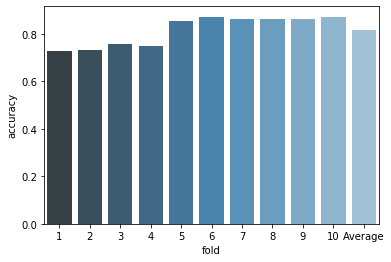

In [36]:
ax = sns.barplot(x="fold",y="accuracy",
                 data=accuracy_df,palette="Blues_d")

# Saving and loading the model

In [25]:
import pickle
with open('sgd1.pickle', 'wb') as f:
    pickle.dump(sgd, f)

In [13]:
with open('clf.pickle', 'rb') as f:
     clf = pickle.load(f)
clf

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                     

In [14]:
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
print(classification_report(Y_test, y_pred))

accuracy 0.8730376467001981
                        precision    recall  f1-score   support

       Adventure novel       0.99      1.00      0.99       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.67      0.65      0.66       330
               Fantasy       0.85      0.90      0.87       361
                Horror       0.98      1.00      0.99       299
      Literary fiction       0.99      1.00      0.99        85
                Memoir       0.96      1.00      0.98       145
               Mystery       0.87      0.89      0.88       452
           Non-fiction       0.97      1.00      0.98       466
                 Novel       0.51      0.21      0.30       296
            Philosophy       0.99      1.00      0.99        74
          Picture book       1.00      0.99      1.00       162
         Romance novel       0.99      1.00      0.99       213
       Science Fiction       0.82      0.78      0.80       283
           

In [15]:
y_pred

array(['historical', 'Young adult literature', "Children's literature",
       ..., 'historical', 'Mystery', 'autobiography'], dtype='<U22')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report
h = .02  # step size in the mesh


Automatically created module for IPython interactive environment


In [28]:
from io import StringIO

col = ['Genres', 'Summary']
df = df[col]
df = df[pd.notnull(df['Summary'])]
df.columns = ['Genres', 'Summary']
df['category_id'] = df['Genres'].factorize()[0]
#print(df['category_id'])
category_id_df = df[['Genres', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genres']].values)
df.head()

,Genres,Summary,category_id
0,Science Fiction,alex teenager living near future england lead...,0
1,Children's literature,ged young boy gont one larger islands north a...,1
2,Science Fiction,living mars deckard acting consultant movie c...,0
3,Science Fiction,beginning several months events blade runner ...,0
4,Science Fiction,nine years emperor paul muad dib walked deser...,0


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Summary)
labels = df.category_id
features.shape

(21869, 174510)

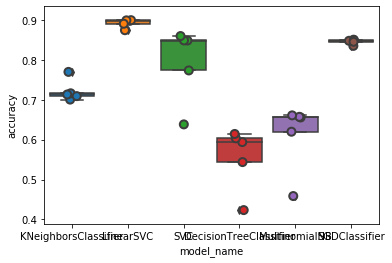

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
names = ["Nearest Neighbors", "Linear SVC", "RBF SVM",
         "Decision Tree", "Multinomial Naive Bayes","SGD"
         ]

models = [
    KNeighborsClassifier(3),
    LinearSVC(random_state=0, tol=1e-5),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),
    ]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [32]:
cv_df.groupby('model_name').accuracy.mean()


model_name
DecisionTreeClassifier    0.555763
KNeighborsClassifier      0.721846
LinearSVC                 0.892405
MultinomialNB             0.610499
SGDClassifier             0.845809
SVC                       0.793863
Name: accuracy, dtype: float64

In [ ]:
#Done taare je karvu hatu e kar 

In [24]:
names = ["Nearest Neighbors", "Linear SVC", "RBF SVM",
         "Decision Tree", "Multinomial Naive Bayes","SGD"
         ]

classifiers = [
    KNeighborsClassifier(3),
    LinearSVC(random_state=0, tol=1e-5),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    MultinomialNB(),
    SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None),
    ]

X, Y = df.Name,df.Genres

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

vect = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
               ])
X_train=vect.fit_transform(X_train)
X_test=vect.transform(X_test).toarray()

    # iterate over classifiers
for name, clf in zip(names, classifiers):
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    print(name)
    y_pred = clf.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

Nearest Neighbors
accuracy 0.5435147081237616
                        precision    recall  f1-score   support

       Adventure novel       0.93      1.00      0.96       211
             Biography       0.97      1.00      0.99       112
 Children's literature       0.22      0.05      0.08       330
               Fantasy       0.38      0.11      0.16       361
                Horror       0.93      0.99      0.96       299
      Literary fiction       0.89      1.00      0.94        85
                Memoir       0.96      1.00      0.98       145
               Mystery       0.40      0.11      0.17       452
           Non-fiction       0.97      1.00      0.98       466
                 Novel       0.12      0.01      0.02       296
            Philosophy       0.97      1.00      0.99        74
          Picture book       0.95      1.00      0.97       162
         Romance novel       0.91      1.00      0.95       213
       Science Fiction       0.29      0.04      0.07    

SGD
accuracy 0.7148300563938425
                        precision    recall  f1-score   support

       Adventure novel       0.78      1.00      0.88       211
             Biography       0.80      1.00      0.89       112
 Children's literature       0.38      0.10      0.16       330
               Fantasy       0.76      0.68      0.72       361
                Horror       0.80      0.99      0.88       299
      Literary fiction       0.75      1.00      0.85        85
                Memoir       0.82      1.00      0.90       145
               Mystery       0.70      0.75      0.72       452
           Non-fiction       0.71      1.00      0.83       466
                 Novel       0.20      0.03      0.05       296
            Philosophy       0.76      1.00      0.86        74
          Picture book       0.75      1.00      0.85       162
         Romance novel       0.80      1.00      0.89       213
       Science Fiction       0.48      0.14      0.21       283
       

In [27]:
names = ["ngram_range not specified i.e. 1", "ngram_range=(1,2)",
         "ngram_range=(1,3)"
         ]

vectorizers = [
    CountVectorizer(),
    CountVectorizer(ngram_range=(1,2)),
    CountVectorizer(ngram_range=(1,3)),
    ]

X, Y = df.Name,df.Genres

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

clf = Pipeline([
                ('tfidf', TfidfTransformer()),
                ('clf',LinearSVC(random_state=0, tol=1e-5)),
               ])

    # iterate over vectorizers
for name, vect in zip(names, vectorizers):
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    X_train1=vect.fit_transform(X_train)
    X_test1=vect.transform(X_test).toarray()

    clf.fit(X_train1, Y_train)
    score = clf.score(X_test1, Y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    print(name)
    y_pred = clf.predict(X_test1)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))
    print(classification_report(Y_test, y_pred))

ngram_range not specified i.e. 1
accuracy 0.7347965249199817
                        precision    recall  f1-score   support

       Adventure novel       0.86      1.00      0.92       211
             Biography       0.87      1.00      0.93       112
 Children's literature       0.30      0.15      0.20       330
               Fantasy       0.68      0.70      0.69       361
                Horror       0.90      0.99      0.94       299
      Literary fiction       0.86      1.00      0.92        85
                Memoir       0.93      1.00      0.96       145
               Mystery       0.68      0.76      0.72       452
           Non-fiction       0.89      1.00      0.94       466
                 Novel       0.17      0.04      0.07       296
            Philosophy       0.91      1.00      0.95        74
          Picture book       0.87      1.00      0.93       162
         Romance novel       0.89      0.98      0.94       213
       Science Fiction       0.39      0.2

  # Multilabel

In [133]:
#159 unique genres
df=pd.read_csv('booksumm_orgjson.csv')
df

,Unnamed: 0,Name,Genres,Summary
0,0,Animal Farm,"[""Roman \u00e0 clef"", ""Satire"", ""Children's li...",old major old boar manor farm calls animals f...
1,1,A Clockwork Orange,"[""Science Fiction"", ""Novella"", ""Speculative fi...",alex teenager living near future england lead...
2,2,The Plague,"[""Existentialism"", ""Fiction"", ""Absurdist ficti...",text plague divided five parts town oran thou...
3,4,A Fire Upon the Deep,"[""Hard science fiction"", ""Science Fiction"", ""S...",novel posits space around milky way divided c...
4,5,All Quiet on the Western Front,"[""War novel"", ""Roman \u00e0 clef""]",book tells story paul bäumer german soldier w...
...,...,...,...,...
12836,16549,The Third Lynx,"[""Science Fiction""]",story starts former government agent frank co...
12837,16551,Remote Control,"[""Thriller"", ""Fiction"", ""Suspense""]",series follows character nick stone ex milita...
12838,16555,Transfer of Power,"[""Thriller"", ""Fiction""]",reader first meets rapp covert operation iran...
12839,16556,Decoded,"[""Autobiography""]",book follows rough chronological order switch...


In [134]:
df.Genres=df.Genres.apply(lambda x:json.loads(x))
df

,Unnamed: 0,Name,Genres,Summary
0,0,Animal Farm,"[Roman à clef, Satire, Children's literature, ...",old major old boar manor farm calls animals f...
1,1,A Clockwork Orange,"[Science Fiction, Novella, Speculative fiction...",alex teenager living near future england lead...
2,2,The Plague,"[Existentialism, Fiction, Absurdist fiction, N...",text plague divided five parts town oran thou...
3,4,A Fire Upon the Deep,"[Hard science fiction, Science Fiction, Specul...",novel posits space around milky way divided c...
4,5,All Quiet on the Western Front,"[War novel, Roman à clef]",book tells story paul bäumer german soldier w...
...,...,...,...,...
12836,16549,The Third Lynx,[Science Fiction],story starts former government agent frank co...
12837,16551,Remote Control,"[Thriller, Fiction, Suspense]",series follows character nick stone ex milita...
12838,16555,Transfer of Power,"[Thriller, Fiction]",reader first meets rapp covert operation iran...
12839,16556,Decoded,[Autobiography],book follows rough chronological order switch...


In [136]:
X=df.Summary
Y=list(df.Genres)


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [138]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer=MultiLabelBinarizer()

y=multilabel_binarizer.fit(df['Genres'])
y = multilabel_binarizer.transform(df['Genres'])

In [147]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,ngram_range=(1,2))
xtrain, xval, ytrain, yval = train_test_split(df['Summary'], y, test_size=0.2, random_state=9)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [140]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score


In [148]:
import math
lr = LogisticRegression(max_iter=math.inf)
clf = OneVsRestClassifier(lr)

In [149]:
clf.fit(xtrain_tfidf, ytrain)

c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 12 is present in all training examples.
  str(classes[c]))
c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 20 is present in all training examples.
  str(classes[c]))
c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 78 is present in all training examples.
  str(classes[c]))
c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 117 is present in all training examples.
  str(classes[c]))
c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 120 is present in all training examples.
  str(classes[c]))
c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\multiclass.py:75: 

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=inf,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [150]:
y_pred = clf.predict(xval_tfidf)

In [151]:
f1_score(yval, y_pred, average="micro")


0.3697478991596639

In [152]:
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
y_pred_new = (y_pred_prob >= t).astype(int)

In [153]:
f1_score(yval, y_pred_new, average="micro")

0.5513320337881741

In [174]:
y_pred

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [138]:
summ=["Alice is sitting with her sister outdoors when she spies a White Rabbit with a pocket watch. Fascinated by the sight, she follows the rabbit down the hole. She falls for a long time, and finds herself in a long hallway full of doors. There is also a key on the table, which unlocks a tiny door; through this door, she spies a beautiful garden. She longs to get there, but the door is too small. Soon, she finds a drink with a note that asks her to drink it. There is later a cake with a note that tells her to eat; Alice uses both, but she cannot seem to get a handle on things, and is always either too large to get through the door or too small to reach the key. While she is tiny, she slips and falls into a pool of water. She realizes that this little sea is made of tears she cried while a giant. She swims to shore with a number of animals, most notably a sensitive mouse, but manages to offend everyone by talking about her cat's ability to catch birds and mice. Left alone, she goes on through the wood and runs into the White Rabbit. He mistakes her for his maid and sends her to fetch some things from his house. While in the White Rabbit's home, she drinks another potion and becomes too huge to get out through the door. She eventually finds a little cake which, when eaten, makes her small again. In the wood again, she comes across a Caterpillar sitting on a mushroom. He gives her some valuable advice, as well as a valuable tool: the two sides of the mushroom, which can make Alice grow larger and smaller as she wishes. The first time she uses them, she stretches her body out tremendously. While stretched out, she pokes her head into the branches of a tree and meets a Pigeon. The Pigeon is convinced that Alice is a serpent, and though Alice tries to reason with her the Pigeon tells her to be off. Alice gets herself down to normal proportions and continues her trek through the woods. In a clearing she comes across a little house and shrinks herself down enough to get inside. It is the house of the Duchess; the Duchess and the Cook are battling fiercely, and they seem unconcerned about the safety of the baby that the Duchess is nursing. Alice takes the baby with her, but the child turns into a pig and trots off into the woods. Alice next meets the Cheshire cat (who was sitting in the Duchess's house, but said nothing). The Cheshire cat helps her to find her way through the woods, but he warns her that everyone she meets will be mad. Alice goes to the March Hare's house, where she is treated to a Mad Tea Party. Present are the March Hare, the Hatter, and the Dormouse. Ever since Time stopped working for the Hatter, it has always been six o'clock; it is therefore always teatime. The creatures of the Mad Tea Party are some of the must argumentative in all of Wonderland. Alice leaves them and finds a tree with a door in it: when she looks through the door, she spies the door-lined hallway from the beginning of her adventures. This time, she is prepared, and she manages to get to the lovely garden that she saw earlier. She walks on through, and finds herself in the garden of the Queen of Hearts. There, three gardeners (with bodies shaped like playing cards) are painting the roses red. If the Queen finds out that they planted white roses, she'll have them beheaded. The Queen herself soon arrives, and she does order their execution; Alice helps to hide them in a large flowerpot. The Queen invites Alice to play croquet, which is a very difficult game in Wonderland, as the balls and mallets are live animals. The game is interrupted by the appearance of the Cheshire cat, whom the King of Hearts immediately dislikes. The Queen takes Alice to the Gryphon, who in turn takes Alice to the Mock Turtle. The Gryphon and the Mock Turtle tell Alice bizarre stories about their school under the sea. The Mock Turtles sings a melancholy song about turtle soup, and soon afterward the Gryphon drags Alice off to see the trial of the Knave of Hearts. The Knave of Hearts has been accused of stealing the tarts of the Queen of Hearts, but the evidence against him is very bad. Alice is appalled by the ridiculous proceedings. She also begins to grow larger. She is soon called to the witness stand; by this time she has grown to giant size. She refuses to be intimidated by the bad logic of the court and the bluster of the King and Queen of Hearts. Suddenly, the cards all rise up and attack her, at which point she wakes up. Her adventures in Wonderland have all been a fantastic dream.",
     "Shere Khan, the tiger, pursues a small Indian boy who strays from his native village, but Shere Khan is lame and misses his leap upon the child. When Father Wolf takes the boy home with him to show to Mother Wolf, Shere Khan follows and demands the child as his quarry. Mother Wolf refuses. The tiger retires in anger. Mowgli, the frog, for such he is named, is reared by Mother Wolf along with her own cubs. Father Wolf takes Mowgli to the Council Rock to be recognized by the wolves. Bagheera, the panther, and Baloo, the bear, speak for Mowgli’s acceptance into the Seeonee wolf pack. Therefore, Mowgli becomes a wolf. Baloo becomes Mowgli’s teacher and instructs him in the lore of the jungle. Mowgli learns to speak the languages of all the jungle people. Throughout his early life, the threat of Shere Khan hangs over him, but Mowgli is certain of his place in the pack and of his friends’ protection; someday when Akela, the leader of the wolves, misses his kill, the pack will turn on him and Mowgli. Bagheera tells Mowgli to get the Red Flower, or fire, from the village to protect himself. When Akela misses his quarry one night and is about to be deposed and killed, Mowgli attacks all of the mutual enemies with his fire sticks and threatens to destroy anyone who molests Akela. That night, Mowgli realizes that the jungle is no place for him, and that someday he will go to live with men. That time, however, is still far off. One day, Mowgli climbs a tree and makes friends with the Bandar-Log, the monkey tribe, who because of their stupidity and vanity are despised by the other jungle people. When the Bandar-Log carries off Mowgli, Bagheera and Baloo go in pursuit, taking along Kaa, the rock python, who loves to eat monkeys. Mowgli is rescued at the old ruined city of the Cold Lairs by the three pursuers, and Kaa feasts royally upon monkey meat. One year during a severe drought in the jungle, Hathi the elephant proclaims the water truce; all animals are allowed to drink at the water hole unmolested. Shere Khan announces to the animals gathered there one day that he killed a man, not for food but from choice. The other animals are shocked. Hathi allows the tiger to drink and then tells him to be off. Then Hathi tells the story of how fear came to the jungle and why the tiger is striped. It is the tiger who first kills man and earns the human tribe’s unrelenting enmity; for his deed, the tiger is condemned to wear stripes. For one day a year, the tiger is not afraid of man and can kill him. This day is called, among jungle people, the Night of the Tiger. One day, Mowgli wanders close to a native village, where he is adopted by Messua, a woman who lost her son some years before. Mowgli becomes a watcher of the village herds; from time to time, he meets Gray Wolf, his brother, and hears the news of the jungle. Learning that Shere Khan intends to kill him, he plans with Akela and Gray Brother to kill the tiger.",
      "Agatha Christie’s detective novel featuring Hercule Poirot is set primarily in Egypt on a boat going down the Nile. Several murders are committed and Poirot, the well-known Belgian detective, is called upon to solve them. The novel begins in England, however, with an apparent love triangle between two young women who are old friends and a young man who is engaged to one of them. Jacqueline de Bellefort, who is engaged to Simon Doyle, goes to visit Linnet Ridgeway to ask her to give Simon a job. Linnet has just inherited a lot of money, Jackie has very little, and Simon has none. Linnet agrees after her friend persuades her of his many virtues. However, Simon soon breaks off his engagement to Jackie and instead marries Linnet. This turn of events sets in motion the rest of the plot. Once they get on the boat in Egypt, the first murder victim is Linnet, who is shot in the head. Of course Simon is the prime suspect. Sadly, Jackie had followed them on their romantic Nile cruise, which Linnet thought was creepy. Therefore, Jackie is also a viable suspect. In a secondary plot, it is revealed that Linnet’s valuable pearls were stolen from her room. Poirot must determine if the two acts are related. Because of her easy access, Linnet’s maid Louise Bourget could have the pearls, and all the other passengers initially seem to have equally good motives and opportunities. Soon Louise is also murdered, and Jackie accidentally shoots Simon in the leg. The atmosphere on board is decidedly tense, but Tim Allerton develops a romantic interest in Rosalie Otterbourne. Her mother, a novelist, approaches Poirot about putting him in a novel. She has figured out the murderer’s identity, but she becomes the next murder victim. With the help of his friend Colonel Race, Poirot figures out that and the pearls were stolen by a wealthy American Marie Van Schuyler, who is a kleptomaniac. Following a clue provided by red nail polish, Poirot realizes Simon was not injured; Jackie and Simon had been scheming to defraud Linnet. As the boat prepares to dock, Jackie (who had a second pistol) kills first herself and then Simon so that they will not be prosecuted.",
      "Bryson describes graphically and in layperson's terms the size of the universe and that of atoms and subatomic particles. He then explores the history of geology and biology and traces life from its first appearance to today's modern humans, placing emphasis on the development of the modern Homo sapiens. Furthermore, he discusses the possibility of the Earth being struck by a meteorite and reflects on human capabilities of spotting a meteor before it impacts the Earth, and the extensive damage that such an event would cause. He also describes some of the most recent destructive disasters of volcanic origin in the history of our planet, including Krakatoa and Yellowstone National Park. A large part of the book is devoted to relating humorous stories about the scientists behind the research and discoveries and their sometimes eccentric behaviours. Bryson also speaks about modern scientific views on human effects on the Earth's climate and livelihood of other species, and the magnitude of natural disasters such as earthquakes, volcanoes, tsunamis, hurricanes, and the mass extinctions caused by some of these events. An illustrated edition of the book was released in November 2005.A few editions in audiobook form are also available, including an abridged version read by the author, and at least three unabridged versions.",
     "Following Dumbledore's death, Harry is moved to a safe location and during this event Mad-Eye is killed. Ron and Hermione decide to join Harry in his quest to destroy the Horcruxes. Some of the clues that Dumbledore left them included: a Golden Snitch for Harry, a Deluminator for Ron, and a book of fairy tales for Hermione. During Bill Weasley's wedding, the Ministry of Magic falls. Harry, Ron and Hermione flee to 12 Grimmauld Place in London. They identify R.A.B. as Sirius' brother Regulus Black and Kreacher reveals that he stole the locket and it now belongs to Dolores Umbridge. They manage to retrieve the locket but cannot destroy it. Ron becomes increasingly angry especially due to the locket's influence and leaves the trio. Harry and Hermione travel to Godric's Hollow, Harry's birthplace where they meet historian Bathilda Bagshot, but she turns out to be Nagini in disguise. They escape to Forest of Dean. A Patronus appears to Harry and guides him to an icy pond containing the Sword of Gryffindor. However, the locket around his neck tries to kill him through the Horcrux and Ron saves Harry. Ron uses the sword to destroy the Horcrux. They visit Xenophilius Lovegood and he explains to them about the Deathly Hallows. Harry realises that Voldemort is seeking the Elder Wand. However, they are all captured and taken to Malfoy Manor. They escape and Griphook tells them of Helga Hufflepuff's cup, which is another Horcrux. They break into the vault, retrieve the cup, and escape on a dragon. They enter Hogwarts through a passageway. Harry realises that Rowena Ravenclaw's diadem is a Horcrux. Ron and Hermione destroy it with a basilisk fang. Voldemort kills Snape after assuming that the Elder Wand is not working because it's loyalty lies with Snape, who disarmed Dumbledore. Snape passes Harry his memories to view in a Pensieve. It is revealed that Snape was a double agent working for Dumbledore because he loved Lily Potter. It was Snape's doe Patronus that lead Harry to the sword. Neville Longbottom manages to kill Voldemort's snake Nagini, the last Horcrux. Voldemort uses the killing curse against Harry. Harry enters Limbo where he meets Dumbledore who explains to him that Voldemort has killed the link between himself and Harry. Harry returns to the living world. Voldemort and Harry battle. Harry reveals to Voldemort that the Elder Wand cannot harm him because its loyalty lies with Harry, as he was the one to disarm Draco Malfoy, who disarmed Dumbledore. Voldemort cast the killing curse on Harry but it refutes and he ends up killing himself. Harry destroys the Elder Wand after the war and the wizarding world returns to peace once more. In the epilogue, 19 years later, Harry, Ron, Hermione see off their children who are off to Hogwarts.",
     " Luke and Leia are traveling to Circarpous IV to persuade the Circarpousians to join the Rebel Alliance. A strange energy storm forces them to crash land on the swampy planet Mimban. Luke, after finding Leia, begins looking for a station that would allow them to get off the planet but instead find a town near which agents of the Empire have a secret energy mine. Forced to keep their identities secret, Luke admonishes Leia to follow his lead, and in a nearby bar where they take refuge, claims she is his servant girl. An old woman named Halla approaches them; while revealing little of her own background, she identifies Luke as one who is strong with the Force and shows him a splinter of what she claims to be the Kaiburr crystal, a glowing crystal that magnifies and focuses the Force. Halla strikes a deal with Luke and Leia that if they help her find it, she will help them get off the planet. They leave together. Upon emerging, Leia retorts that Luke ought not to have struck her; the two squabble as some miners emerge from the bar. The miners claim that fighting in public is against Imperial law here, and they all get into a brawl. Imperial stormtroopers intervene and take Luke, Leia and the miners to the local jail. They are questioned by Captain-Supervisor Grammel. The miners are taken away while Grammel continues questioning Luke and Leia. Grammel discovers and confiscates the crystal shard, along with Luke's weapons. Luke and Leia are placed in the maximum security cell with two drunken but friendly Yuzzem--hairy aboriginal creatures resembling squat Sasquatch--called Hin and Kee, while Grammel reports the incident and the crystal shard to Governor Bin Essada, in charge of the group of star systems including Circarpous. Halla, with Luke's help, uses the Force to help rescue Luke, Leia and the two Yuzzem; the two Yuzzem rampage through the jail barracks, while Luke and Leia escape, and the four meet Halla to find the Temple of Pomojema, which Halla believes to be the location of the Kaiburr crystal. They travel through the swampy wilds of Mimban, during which travel they encounter a wandrella, a huge worm-like creature. The wandrella pursues them, forcing them to leave the transport and splitting Luke and Leia apart from Halla, the droids and the Yuzzem. Luke and Leia hide in a deep well, down which the wandrella falls, leaving the two trapped in the well as it destroys their escape path; Halla mentions from the lip of the well that there must be an escape route, and Luke and Leia go in search of it, though their travels involve floating across a lake on lily pads, and fending off creatures of the deep with Luke's light saber. On the other side of the lake, they encounter the secretive residents of the caves, Coway guards/patrols. They kill all but one of the Coway; the survivor escapes and tells his Coway tribe about the visitors. Luke and Leia follow the single Coway to the tribe, where they find Halla's group being held as prisoners. To save his friends, Luke defeats the Coway's champion fighter. The Coway become his friends, but Luke senses Darth Vader. Coway patrols confirm Luke's feeling: Imperials, led by Darth Vader and Captain-Supervisor Grammel, are attacking the underground cave. When the Imperials arrive, they are surprised by the Coway tribe's powerful response and face a debacle. Vader and Grammel retreat with the handful of surviving stormtroopers, though Vader loses patience with Grammel for the defeat and kills him. Luke and company steal an Imperial transport left behind, and begin travelling to the Temple themselves. They beat Vader to the temple and find the Kaiburr crystal. They encounter a monster, and unsuccessfully try to fight it off with blasters. Luke tells Hin and Kee to get some rifles. Luke cuts down one of the pillars holding up the temple, crushing the monsters. Luke's leg is pinned under a fallen boulder. Darth Vader then enters the Temple of Pomojema, announcing that he killed Hin and Kee. Leia takes up Luke's lightsaber and begins fighting Darth Vader, but he toys with her, giving her multiple superficial burns with his own saber. Hin, mortally wounded, shows up and in his dying act, lifts the big rock off of Luke's leg. Luke fights Vader, showing more skill than expected, deflecting some Force-based attacks and eventually slicing off Vader's arm. Despite this, the Sith Lord seems about to win, but then falls into a pit. Luke senses that Vader is still alive. As the story ends, Leia and Luke, healed by the crystal, drive off with Halla into the mists of Mimban.",
     " The novelâ€™s protagonist, the â€œcrap artistâ€ of the title, is Jack Isidore, a socially awkward tire regroover obsessed with amateur scientific inquiry since his teens. He catalogs old science magazines, collects worthless objects, and believes disproved theories, such as the notions that the Earth is hollow or that sunlight has weight. Broke, Jack eventually moves in with his sisterâ€™s family in a luxurious farm house in suburban California. On the farm, Jack happily does housework and cares for livestock. He also joins a small apocalyptic religious group, which shares his belief in extra-sensory perception, telepathy and UFOs and believes the world will end on April 23, 1959. However, most of his time is dedicated to a meticulous â€œscientific journalâ€ of life on the farm, including his sisterâ€™s marital difficulties. Jackâ€™s sister, Fay Hume, is a difficult and subtly controlling woman who makes miserable everyone close to her, especially her misogynist husband Charley. Fay has an extramarital affair with a young grad student named Nat Anteil while Charley is in a hospital recovering from a heart attack. After Jack reports this to Charley, the latter plots to kill Fay. Charley kills Fay's animals and then commits suicide, realising that Fay has led him to do this. However, his will stipulates that Jack will inherit half the house, and Fay must buy her brother out, although Jack has used his half of the money to replace the slaughtered animals. Nat and his wife Gwen divorce, and Nat decides to stay with Fay. When the end of the world doesn't occur on the predicted date, Jack decides to seek psychiatric assistance.",
      " The plot focuses on Adam Salton, originally from Australia, who is contacted by his great-uncle, Richard Salton, in 1860 Derbyshire for the purpose of establishing a relationship between these last two members of the family. His great-uncle wants to make Adam his heir. Adam travels to Richard Salton's house in Mercia, Lesser Hill, and quickly finds himself at the centre of mysterious and inexplicable occurrences. The new heir to the Caswall estate, known as Castra Regis, the Royal Camp, Edgar Caswall, appears to be making some sort of a mesmeric assault on a local girl, Lilla Watford, while a local lady, Arabella March, seems to be running a game of her own, perhaps angling to become Mrs. Caswall. Adam Salton discovers black snakes on the property and buys a mongoose to hunt them down. He then discovers a child who has been bitten on the neck. The child barely survives. He learns that another child was killed earlier while animals were also killed in the region. The mongoose attacks Arabella who shoots it to death. Arabella tears another mongoose apart with her hands. Arabella then murders Oolanga, the African servant, by dragging him down into a pit or hole. Adam witnesses the murder which he cannot prove. Adam then suspects Arabella of the other crimes. Adam and Sir Nathaniel de Salis, who is a friend of Richard Salton's, then plot to stop Arabella by whatever means necessary. They suspect that she wants to murder Mimi Watford, whom Adam later marries. Nathaniel is an Abraham Van Helsing type of character who wants to hunt down Arabella. The White Worm is a large snake-like creature that dwells in the hole or pit in Arabella's house located in Diana's Grove. The White Worm has green glowing eyes and feeds on whatever is thrown to it in the pit. The White Worm ascends from the pit and seeks to attack Adam and Mimi Watford in a forest. Adam plans to pour sand into the pit and to use dynamite to kill the giant White Worm while it is inside the pit. Edgar Caswall is a slightly pathological eccentric who has Mesmer's chest which he keeps at the Castra Regis Tower. Caswall wants to recreate mesmerism, associated with Anton Mesmer, which was a precursor to hypnotism. He has a giant kite in the shape of a hawk to scare away pigeons which have gone berserk and have attacked his fields. In the final scene, Adam Salton, Mimi Watford, and Nathaniel de Salis confront Arabella and Edgar Caswall. A thunderstorm and lightning destroy Diana's Grove by igniting the dynamite."
     
     ]
s1=str("Hazel Grace Lancaster, a 16-year-old with thyroid cancer that has spread to her lungs, attends a cancer patient support group at her mother's behest. At one meeting, Hazel meets a 17-year-old boy currently in remission named Augustus Waters, whose osteosarcoma caused him to lose his right leg. Augustus is at the meeting to support Isaac, his friend who has eye cancer. They meet after the support group and begin to talk. When everything seems to be going well, Augustus pulls out a cigarette and puts it between his lips. Hazel is disgusted by this and yells at him saying that he's already got cancer and he wants to pay money for more cancer. Augustus explains that he does not actually light the cigarette. He says, 'You put an object of death right between your lips, but you don't give it the power to kill you.' Hazel, impressed by this, goes to his house to watch a movie. Hazel and Augustus strike a bond immediately and agree to read each other's favorite novels. Augustus gives Hazel The Price of Dawn, and Hazel recommends An Imperial Affliction, a novel written by Peter Van Houten, who lives in Amsterdam, about a cancer-stricken girl named Anna that parallels Hazel's own experience. After Augustus finishes reading her book, he is frustrated upon learning that the novel ends abruptly without a conclusion. The novel ends in the middle of a sentence, which means she either died or became too sick to continue telling the story. Hazel explains the novel's author retreated following the novel's publication and has not been heard from since.A week later, Augustus reveals to Hazel that he has tracked down Van Houten's assistant, Lidewij, and, through her, has managed to start an e-mail correspondence with Van Houten. The two write to Van Houten with questions regarding the novel's ending and the fate of the mother of Anna. Van Houten eventually replies, explaining that he can only answer Hazel's questions in person. At a picnic, Augustus surprises Hazel with tickets to Amsterdam to meet Van Houten, acquired through the Make-A-Wish Foundation. While on the plane to Amsterdam, Augustus confesses his love for Hazel. Hazel and Augustus finally meet Van Houten but are shocked to find that he is a mean-spirited drunk. Horrified by Van Houten's behavior, Lidewij confesses to having arranged the meeting on his behalf, angering Van Houten, who proceeds to insult Hazel's cancer, starting an argument and causing Hazel and Augustus to flee from his home. Lidewij resigns as Van Houten's assistant and takes Hazel and Augustus to the Anne Frank House, where Augustus and Hazel share their first kiss. Hazel and Augustus go out for a fancy dinner while in Amsterdam where they drink champagne and 'taste the stars'. Later that night Hazel and Augustus have sex in Augustus's hotel room, the first time for both of them. While having sex, Hazel tells Augustus she loves him. Augustus confesses to Hazel that his cancer has returned. The two affirm their love and support for one another. Upon their return to Indianapolis, Augustus's health worsens and he ends up in the ICU for a few days. Fearing his death, Augustus invites Isaac and Hazel to his pre-funeral, where they give eulogies. Augustus dies soon after, leaving Hazel heartbroken. Van Houten shows up at Augustus's funeral to apologize to Hazel, but Hazel does not forgive him. Hazel learns that Augustus was not writing a sequel to An Imperial Affliction like he told her, but an obituary for her, and reads it after Lidewij discovers it amidst Van Houten's letters. It states that getting hurt in this world is unavoidable, but we do get to choose whom we allow to hurt us, and that he is happy with his choice, and hopes she likes hers too. The book closes with Hazel stating that she is happy with her choice.")
for i in range(8):
    summ[i]=preprocesswithoutstem(summ[i])
# s1=preprocesswithoutstem(s1)
y_pred=nb.predict(summ)
print(y_pred)
y_pred=sgd.predict(summ)
y_pred


["Children's literature" "Children's literature" 'fiction' 'Non-fiction'
 'Fantasy' 'Science Fiction' 'fiction' 'fiction']


array(["Children's literature", "Children's literature", 'fiction',
       'Science Fiction', 'Fantasy', 'Science Fiction', 'Science Fiction',
       'Science Fiction'], dtype='<U22')

In [135]:
n=0
for i in range(4370):
    prediction = svc.predict([preprocesswithoutstem(X_test.iloc[i])])
    
    a=Y_test[i]
    p=prediction[0]
    if a!=p:
      # print('Actual label:' + a)
      # print("Predicted label: " + p)
        n+=1

print(n)

612


# Name

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [118]:
df=pd.read_csv('ds_beforeduplication.csv')

In [119]:
X=df.Name
Y=list(df.Genres)


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [123]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import normalize,StandardScaler,MinMaxScaler
nb = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                ('tfidf', TfidfTransformer()),
#                 ('svd',TruncatedSVD(n_components=1000)),
# #                ('pca',PCA(n_components=500, copy=True, whiten=False, svd_solver='full', tol=0.0, iterated_power='auto', random_state=None)),      
#                 ('ss',MinMaxScaler()),
                ('clf', MultinomialNB()),
               ])
nb.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [124]:
from sklearn.metrics import classification_report
Y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred))

accuracy 0.23068181818181818
                        precision    recall  f1-score   support

       Adventure novel       0.00      0.00      0.00        13
             Biography       0.00      0.00      0.00        11
 Children's literature       0.22      0.26      0.24       337
               Fantasy       0.22      0.01      0.02       195
                Horror       0.00      0.00      0.00        28
      Literary fiction       0.00      0.00      0.00         6
                Memoir       0.00      0.00      0.00        14
               Mystery       0.82      0.11      0.19       248
           Non-fiction       0.00      0.00      0.00        51
                 Novel       0.09      0.01      0.02       267
            Philosophy       0.00      0.00      0.00         8
          Picture book       0.00      0.00      0.00         8
         Romance novel       0.00      0.00      0.00        14
       Science Fiction       0.36      0.18      0.24       297
          

c:\users\ghata\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer
#from sklearn import preprocessing

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['Genres'])

# transform target variable
y = multilabel_binarizer.transform(df['Genres'])


In [12]:

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain, xval, ytrain, yval = train_test_split(df[['Name','Summary']], y, test_size=0.2, random_state=9)
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)



In [13]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

import math
lr = LogisticRegression(max_iter=math.inf)
clf = OneVsRestClassifier(lr)

clf.fit(xtrain_tfidf, ytrain)

clf

ValueError: Found input variables with inconsistent numbers of samples: [2, 10272]

In [88]:
y_pred = clf.predict(xval_tfidf)

f1_score(yval, y_pred, average="micro")
#clf.score(yval, y_pred)



0.11518642012731131

In [89]:
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
y_pred_new = (y_pred_prob >= t).astype(int)

f1_score(yval, y_pred_new, average="micro")


0.3804560260586319

In [40]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    #q_pred = clf.predict(q_vec)

    q_pred_prob = clf.predict_proba(q_vec)
    t = 0.2505 # threshold value 0.2505 -> 0.7110468896756014
    q_pred_new = (q_pred_prob >= t).astype(int)

    return multilabel_binarizer.inverse_transform(q_pred_new)



In [154]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Book: ", df['Name'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",df['Genres'][k], "\n")

Book:  Memnoch the Devil 
Predicted genre:  [('Fantasy', 'Fiction', 'Speculative fiction')]
Actual genre:  ['Gothic fiction', 'Fantasy', 'Speculative fiction', 'Horror', 'Fiction'] 

Book:  The Soul of a New Machine 
Predicted genre:  [('Science Fiction', 'Speculative fiction')]
Actual genre:  ['Mathematics', 'Science'] 

Book:  Dragon Venom 
Predicted genre:  [('Fantasy', 'Fiction', 'Speculative fiction')]
Actual genre:  ['Speculative fiction', 'Fantasy', 'Fiction'] 

Book:  Windswept House: A Vatican Novel 
Predicted genre:  [('Fiction', 'Speculative fiction')]
Actual genre:  ['Novel'] 

Book:  Bad Land: An American Romance 
Predicted genre:  [('Fiction', 'Novel')]
Actual genre:  ['Travel', 'Fiction', 'Romance novel'] 



In [45]:
import re
def clean_text(text):
    text = re.sub("\'", "", text) 
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    text = text.lower() 
    return text

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [3]:
df=pd.read_csv('booksumm_orgjson.csv')
df

,Unnamed: 0,Name,Genres,Summary
0,0,Animal Farm,"[""Roman \u00e0 clef"", ""Satire"", ""Children's li...",old major old boar manor farm calls animals f...
1,1,A Clockwork Orange,"[""Science Fiction"", ""Novella"", ""Speculative fi...",alex teenager living near future england lead...
2,2,The Plague,"[""Existentialism"", ""Fiction"", ""Absurdist ficti...",text plague divided five parts town oran thou...
3,4,A Fire Upon the Deep,"[""Hard science fiction"", ""Science Fiction"", ""S...",novel posits space around milky way divided c...
4,5,All Quiet on the Western Front,"[""War novel"", ""Roman \u00e0 clef""]",book tells story paul bäumer german soldier w...
...,...,...,...,...
12836,16549,The Third Lynx,"[""Science Fiction""]",story starts former government agent frank co...
12837,16551,Remote Control,"[""Thriller"", ""Fiction"", ""Suspense""]",series follows character nick stone ex milita...
12838,16555,Transfer of Power,"[""Thriller"", ""Fiction""]",reader first meets rapp covert operation iran...
12839,16556,Decoded,"[""Autobiography""]",book follows rough chronological order switch...


In [4]:
df.Genres=df.Genres.apply(lambda x:json.loads(x))